In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data=data[data['Species']!='Iris-setosa']

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [7]:
data['Species']=data['Species'].map({'Iris-versicolor':0,'Iris-virginica':1})

In [8]:
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,0
51,52,6.4,3.2,4.5,1.5,0
52,53,6.9,3.1,4.9,1.5,0
53,54,5.5,2.3,4.0,1.3,0
54,55,6.5,2.8,4.6,1.5,0


In [9]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
xtrain

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,66,6.7,3.1,4.4,1.4
90,91,5.5,2.6,4.4,1.2
146,147,6.3,2.5,5.0,1.9
59,60,5.2,2.7,3.9,1.4
122,123,7.7,2.8,6.7,2.0
...,...,...,...,...,...
110,111,6.5,3.2,5.1,2.0
121,122,5.6,2.8,4.9,2.0
64,65,5.6,2.9,3.6,1.3
142,143,5.8,2.7,5.1,1.9


In [11]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50],'max_iter':[100,200,300,400,500,1000]}


In [13]:
classfier_regressor=GridSearchCV(lc,param_grid=parameter,scoring='accuracy',cv=5)

In [14]:
classfier_regressor.fit(xtrain,ytrain)

C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manoj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [15]:
print(classfier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [16]:
classfier_regressor.best_score_

1.0

In [17]:
y_pred=classfier_regressor.predict(xtest)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]


In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
accuracy_score(y_pred,ytest)

1.0

In [20]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



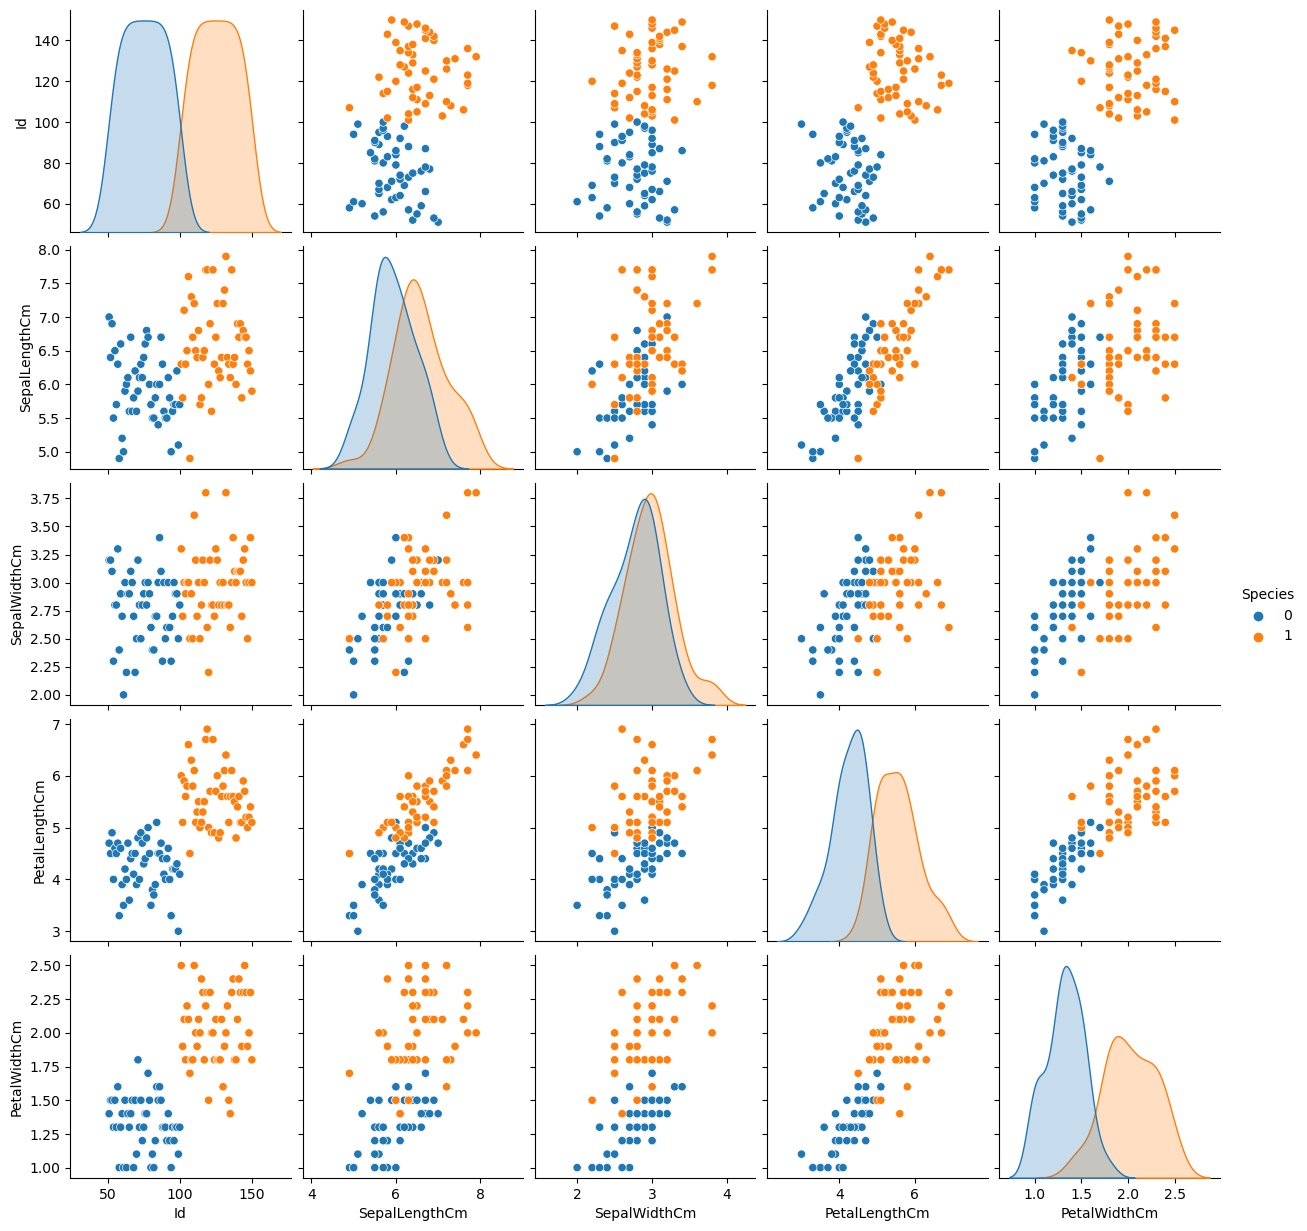

In [21]:
sns.pairplot(data,hue='Species')

In [5]:
data.corr()

NameError: name 'data' is not defined

In [23]:
## Multi class fitication 

In [24]:
import seaborn as sns 
import pandas as pd
import numpy as np
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [26]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y=lc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
xtrain

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5,5.0,3.6,1.4,0.2
32,33,5.2,4.1,1.5,0.1
142,143,5.8,2.7,5.1,1.9
85,86,6.0,3.4,4.5,1.6
86,87,6.7,3.1,4.7,1.5
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [29]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [30]:
y_pred=lr.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,ytest)

1.0

In [32]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

